# Oncology RWD: Data Exploration
This notebook explores synthetic oncology patient data, simulating EHR and biomarker records.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load synthetic data
df = pd.read_csv('../data/synthetic_oncology_patients.csv')
df.head()

,patient_id,age,gender,cancer_type,stage,diagnosis_date,biomarker_status,treatment,adverse_event,survival_months
0,P001,67,F,Breast,II,2021-03-15,HER2+,Trastuzumab,NaN,28
1,P002,59,M,Lung,III,2020-11-02,EGFR+,Osimertinib,Rash,18
2,P003,72,F,Colorectal,IV,2019-07-21,BRAF-,FOLFOX,Neuropathy,12
3,P004,50,M,Prostate,II,2022-01-10,AR+,Abiraterone,NaN,30
4,P005,64,F,Ovarian,III,2021-06-18,BRCA1+,Carboplatin,Neutropenia,22


## Patient Demographics

In [3]:
# Demographic summary
df[['age', 'gender', 'cancer_type', 'stage']].describe(include='all')

,age,gender,cancer_type,stage
count,10.000000,10,10,10
unique,NaN,2,5,3
top,NaN,F,Breast,II
freq,NaN,5,2,4
mean,62.200000,NaN,NaN,NaN
std,9.186947,NaN,NaN,NaN
min,48.000000,NaN,NaN,NaN
25%,56.000000,NaN,NaN,NaN
50%,63.000000,NaN,NaN,NaN
75%,69.250000,NaN,NaN,NaN


## Cancer Type Distribution

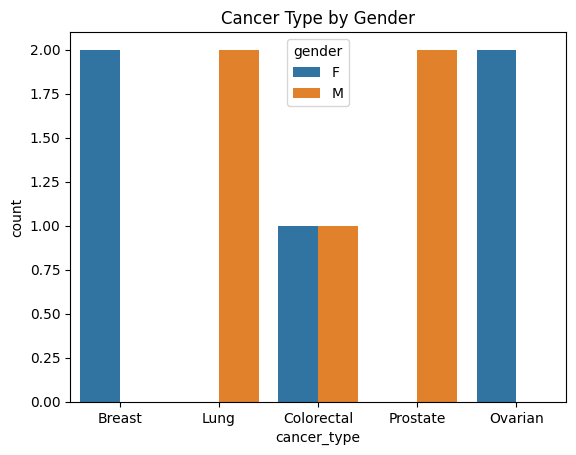

In [4]:
sns.countplot(data=df, x='cancer_type', hue='gender')
plt.title('Cancer Type by Gender')
plt.show()

## Biomarker Status vs. Treatment

In [5]:
pd.crosstab(df['biomarker_status'], df['treatment'])

treatment,Abiraterone,Alectinib,Carboplatin,Docetaxel,FOLFIRI,FOLFOX,Osimertinib,Paclitaxel,Trastuzumab
biomarker_status,,,,,,,,,
ALK+,0,1,0,0,0,0,0,0,0
AR+,1,0,0,0,0,0,0,0,0
AR-,0,0,0,1,0,0,0,0,0
BRAF+,0,0,0,0,1,0,0,0,0
BRAF-,0,0,0,0,0,1,0,0,0
BRCA1+,0,0,1,0,0,0,0,0,0
BRCA2-,0,0,0,0,0,0,0,1,0
EGFR+,0,0,0,0,0,0,1,0,0
HER2+,0,0,0,0,0,0,0,0,1


## Survival Analysis (Simple)

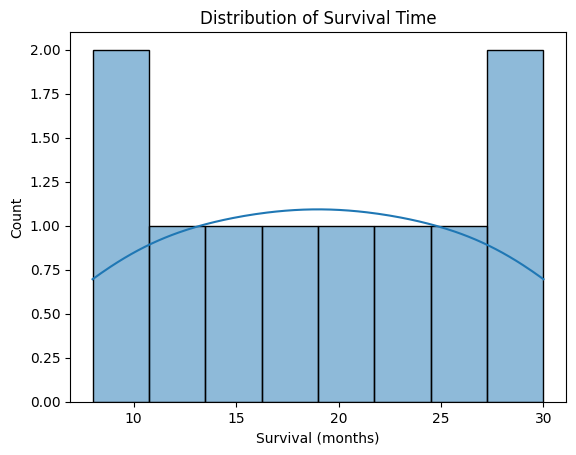

In [6]:
sns.histplot(df['survival_months'], bins=8, kde=True)
plt.xlabel('Survival (months)')
plt.title('Distribution of Survival Time')
plt.show()